# 1. Introducción teórica

El **aprendizaje no supervisado** se caracteriza por buscar relaciones ocultas en los datos para encontrar relaciones o patrones subyacentes. Es mu útil porque encuentra patrones desconocidos en los datos.

No existe una variable target a predecir.



El objetivo de los algoritmos de clustering es agrupar los datos de tal forma que los elementos de cada grupo (cluster) sean lo más similares posible entre sí y lo más disimilares posible con los elementos de otros grupos (ie: que los grupos sean compactos).

El **agrupamiento jerárquico** busca una jerarquía de clusters en los datos para generar los clusters, y estos se pueden generar con dos aproximaciones: aglomerativa y divisiva.

- *Enfoque aglomerativo:* este método comienza con cada muestra siendo un grupo diferente y luego fusionándolas por las que están más cerca unas de otras hasta que sólo haya un grupo (el más utilizado).

- *Enfoque divisivo:* este método comienza por englobar todos los puntos de datos en un solo grupo. Luego, dividirá el grupo iterativamente en otros mas pequeños hasta que cada uno de ellos contenga sólo una muestra.

Gráficamente, se puede examinar el resultado con herramientas como **dendrogramas**, que es una especie de árbol binario donde cada nodo representa un cluster. Se representa gráficamente de tal manera que la distancia entre dos nodos y su padre es proporcional a la disimilitud interclúster de los dos nodos.

No es necesario especificar el número de clusters a priori, pero sí la distancia a partir de la cual se van a dividir los datos.

## 1.1 Distancias

https://ichi.pro/es/9-medidas-de-distancia-en-ciencia-de-datos-159983401462266

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise


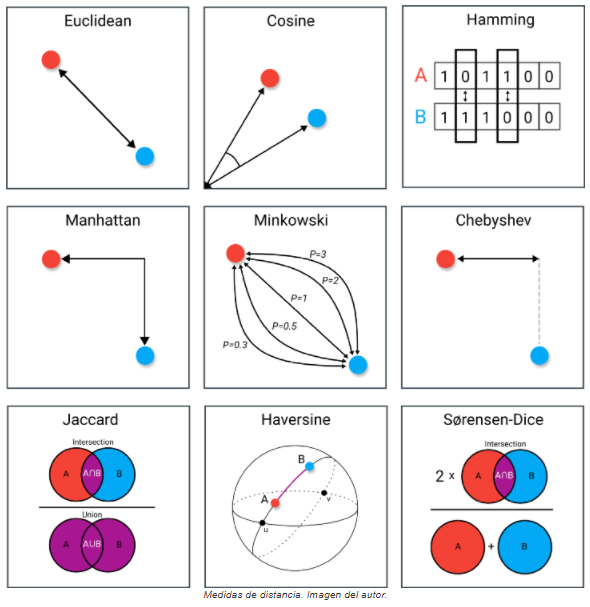



# 2. Clustering Aglomerativo

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering


Cada nodo es un conjunto de ejemplos (cluster), que se van uniendo según los criterios de distancia. 
Cuando se representa en el dendograma la longitud de las líneas verticales indica la distancia entre los clusters.
Se parte de K = n clusters que se van uniendo iterativamente hasta K=1. Al principio cada ejemplo tiene su propio cluster, y tras la primera unión hay K-1 clusters. El algoritmo acaba con K=1 (un único cluster).

Inicialmente cada punto de datos se considera como un clúster individual. En cada iteración, los grupos similares se fusionan con otros grupos hasta que se forma un grupo o grupos K.
El algoritmo es sencillo:

1. Se calcula la distancia entre cada par de puntos y se almacena en una matriz de distancia.
2. Se coloca cada punto en su propio grupo.
3. Se fusionan  los pares de puntos más cercanos de acuerdo a las distancias de la matriz de distancia  un clúster menos.
4. Se recalculan las distancias y se almacenan en una nueva matriz.
5. Se itera hasta que todos los clusters se fusionan en uno solo

Las **medidas de vinculación o linkage methods** son las que deciden las reglas del clustering (producen diferentes resultados):
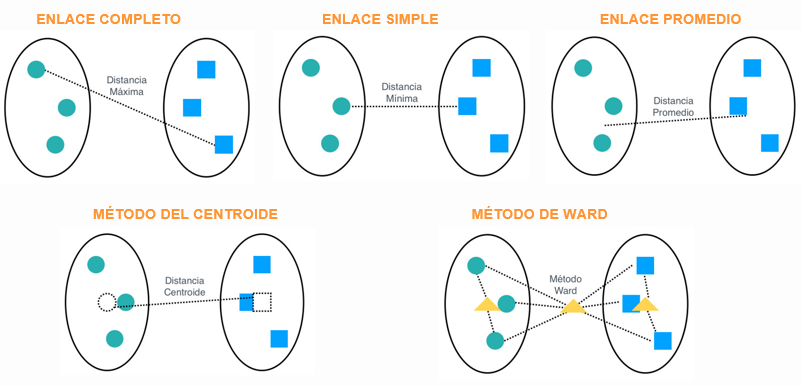


- **Enlace completo:** Calcula la distancia máxima entre clústeres antes de la fusión. Para cada par de clústeres, el algoritmo los calcula y fusiona para minimizar la distancia máxima entre los clústeres, en otras palabras, la distancia de los elementos más lejanos.
- **Enlace simple:** La distancia entre dos grupos es la distancia más corta entre dos puntos cualquiera de cada grupo. Calcula la distancia mínima entre los clústeres antes de la fusión. Este enlace se puede utilizar para detectar valores altos en tu conjunto de datos que pueden ser valores atípicos, ya que se fusionarán al final.
- **Enlace promedio:** el algoritmo utiliza la distancia media entre los pares de ptos clústeres.
- **Método del centroide:** Encuentra el centroide (pto medio baricentro) del clúster 1 y el centroide del clúster 2, y luego calcula la distancia entre los dos antes de fusionarse.
- **Método de Ward:** En este método se consideran todos los clústeres y el algoritmo calcula la suma de las distancias cuadradas dentro de los clústeres y las fusiona para minimizarlas.  Se minimizan las distancias del punto  al centroide.

Desde un punto de vista estadística, el proceso de aglomeración conduce a una reducción de la varianza de cada clúster resultante.



In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import numpy as np

(150, 2)


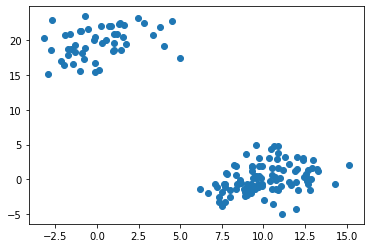

In [2]:


a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
# Sea Z array de enlace del cluster con la información de las uniones. La salida es un vector de longitud k-1 que da información
# de operaciones realizadas en cada paso (ie: las k-1 uniones que se han llevado a cabo durante el clustering).

Z = linkage(X, "ward")

In [4]:
# Z[i] nos dirá qué clusters fueron unidos en la iteración `i`: [idx1, idx2, distancia, número de muestras]
print(Z[46])

print(Z[152-len(X)])# cluster 152
print(Z[158-len(X)])#cluster 158

[103.         134.           0.46973398   2.        ]
[25.         61.          0.08730631  2.        ]
[100.         114.           0.15556733   2.        ]


La bondad del clustering se mide con el **Cophenetic Correlation Coefficient**  (https://en.wikipedia.org/wiki/Cophenetic_correlation). Esta función compara (correla) las distancias reales entre todas las muestras de nuestro dataset con aquellas que implica el clustering obtenido. Cuanto más cerca este el valor de 1, mejor preserva el clustering las distancias originales, por lo que mejor es el clusering.

In [5]:
c, coph_dists = cophenet(Z, pdist(X))
print(c)

0.9774061493993849


### Dendrograma / Dendrograma Truncado

 - Las lineas horizontales son uniones de clusters
 - Las líneas verticales nos indican que clústers son parte de cada unión
 - Las alturas de las líneas verticales nos indican la distancia que se "cubrió" al hacer la unión

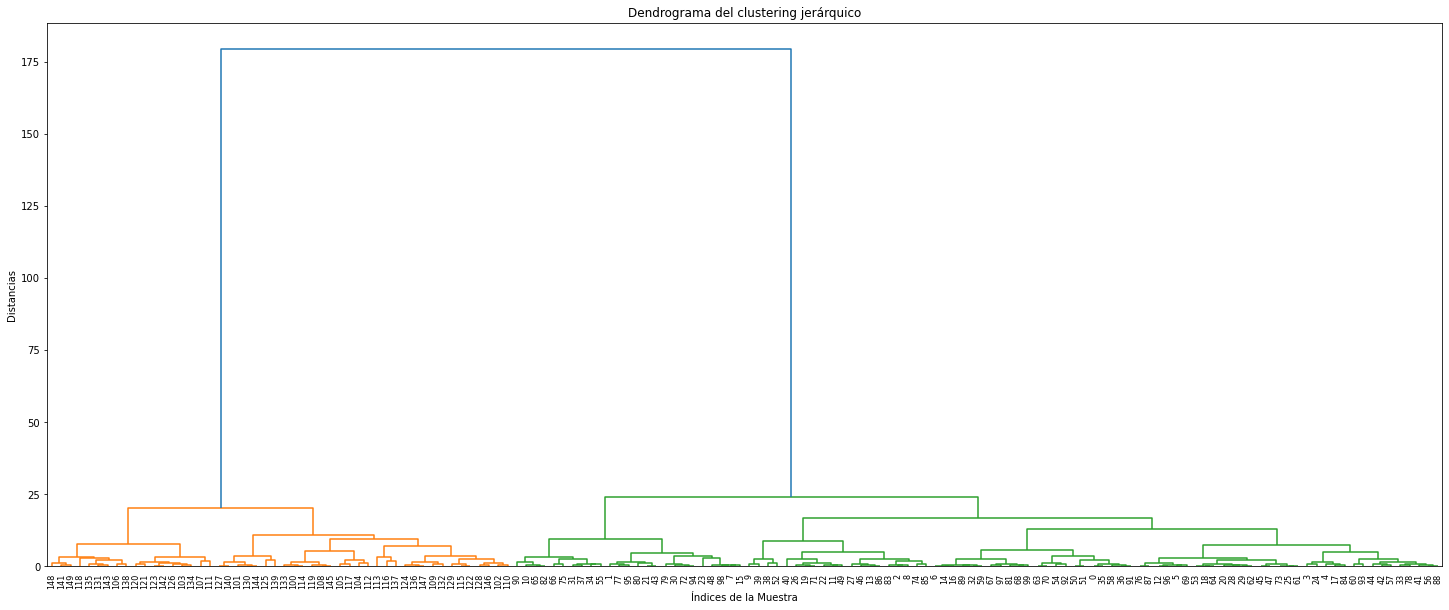

In [6]:
# Dendrograma
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.7*180)
plt.show()

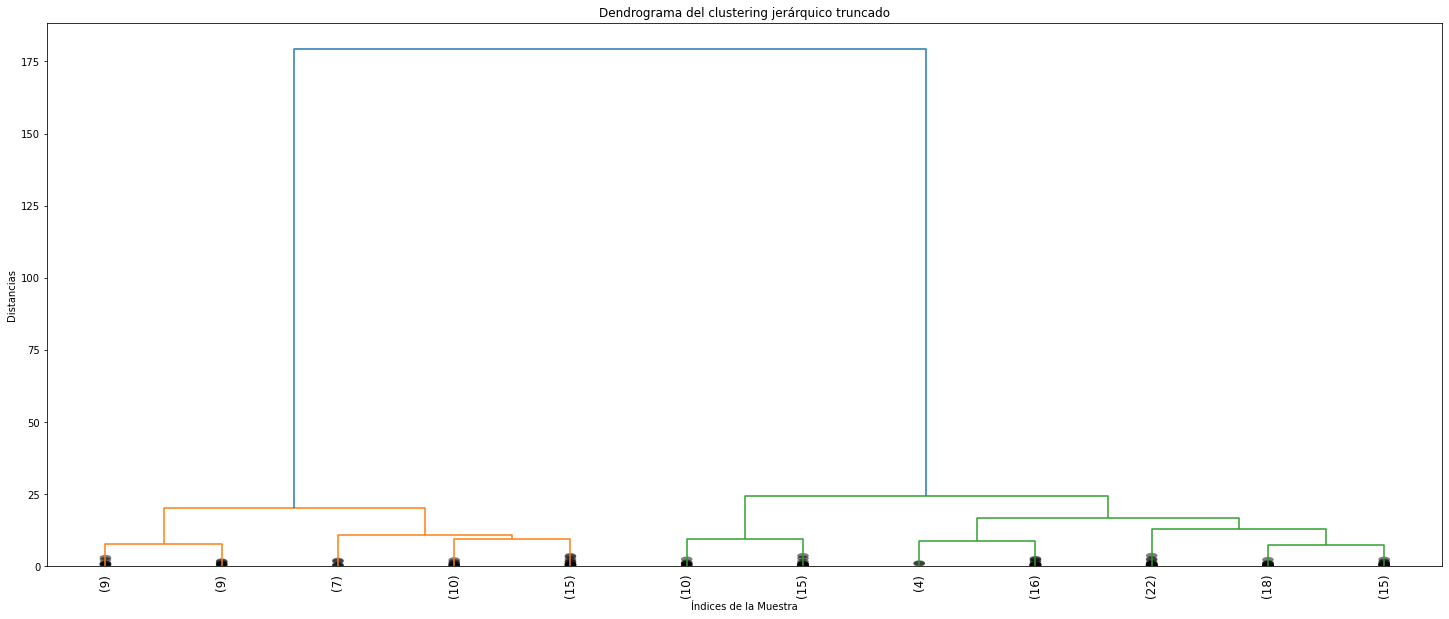

In [7]:
# Dendrograma Truncado
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico truncado")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=12.0, color_threshold=0.7*180,
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True,)
plt.show()

In [8]:
def tuned_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

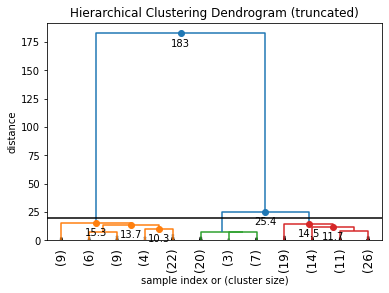

In [9]:
tuned_dendrogram(Z,truncate_mode='lastp',p=12, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=20)
plt.show()

### Recuperar los clusters

In [10]:
from scipy.cluster.hierarchy import fcluster

In [11]:
max_d=25
clusters = fcluster(Z, max_d, criterion="distance")
clusters

array([3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
       3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2,
       2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2,
       3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

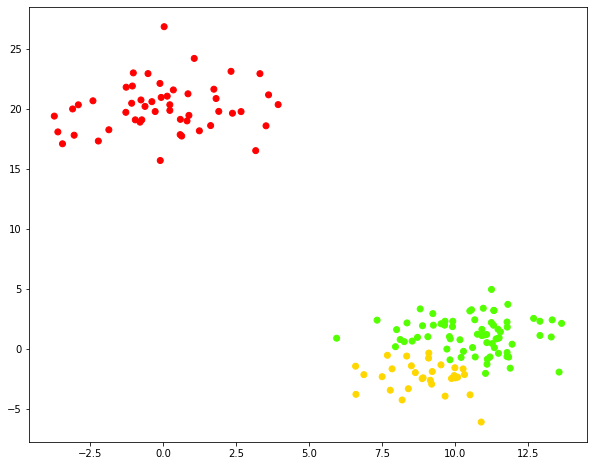

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="prism")
plt.show()

# 3. Clustering Divisivo

Todos los nodos forman un único cluster, que se van dividiendo según los criterios de distancia. 
Cuando se representa en el dendograma la longitud de las líneas verticales indica la distancia entre los clusters.
Se parte de K = 1 clusters que se van separando iterativamente hasta K=n. Al principio se tiene un único cluster, y tras la primera división hay K-1 clusters. El algoritmo acaba con K=n clusters..

Inicialmente se parte de un único cluster formado por todos los datos. En cada iteración, los elementos se van dividiendo.
El algoritmo es sencillo:

1. Existe un único cluster con todos los ejemplos
2. Primera división, hay K=2 clusters
3. Tras la i-ésima iteración (división) existen K = i+1 clusters
4. El algoritmo finaliza cuando K=n (cada ejemplo tiene su propio cluster)

Este algoritmo es mucho más complejo, por eso la mayoría de librerías de python no lo tienen implementado.